# Case Study:  Credit EDA

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',10000)
pd.set_option('display.max_rows',20000)

# 1. Reading the data files 

In [3]:
#importing the application_data.csv and taking 50% of the data to avoid memory issues

#filename = "application_data.csv"
#num_lines = sum(1 for l in open(filename))
#sample size of 50%
#size = int(num_lines//2)
#random.seed(100)
#skip_id = random.sample(range(1,num_lines),num_lines-size)
#df_curr = pd.read_csv("application_data.csv",skiprows = skip_id)

In [4]:
#importing the application_data.csv
df_curr = pd.read_csv("application_data.csv ")

In [5]:
#importing the previous_application data.csv
df2_previous = pd.read_csv("previous_application.csv")

# 2. Inspecting data file

In [6]:
#checking the shape of both the imported files
print("Applications data shape", df_curr.shape)
print("previous_applications data shape", df2_previous.shape)

Applications data shape (307511, 122)
previous_applications data shape (1670214, 37)


In [7]:
# checkling the first 5 rows of application data
df_curr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df_curr.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [9]:
df2_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#  3. Data Quality checks and handling missing values

In [10]:
# columnwise null count for application data
df_curr.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#column-wise null percentage of the application data
df1_col_p = round((df_curr.isnull().sum()/len(df_curr.index))*100,2)
print("column wise percentage in df1- application data", df1_col_p)

column wise percentage in df1- application data SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FL

Those columns with null percentage >=47% can be removed from this data as it would not allow to do any analsys with such high range of missing values.
Hence, deleting the columns 'OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'



<b> Removing columns with high missing percentage >=47% </b>

In [12]:
del_columns = ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','EMERGENCYSTATE_MODE',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','YEARS_BUILD_MEDI','LANDAREA_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE']

df_curr.drop(columns=del_columns, axis=1,inplace=True)
print("Applications data shape after deleting columns ", df_curr.shape)

Applications data shape after deleting columns  (307511, 73)


In [13]:
# recalculating null percentage of columns
#column-wise null percentage
col_p = round((df_curr.isnull().sum()/len(df_curr.index))*100,2)
print("column wise percentage after dropping few column in df1- application data", col_p)

column wise percentage after dropping few column in df1- application data SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
F

<b>  Handling missing values in Application_data.csv variables </b>


 <b> 1. We can notice that the "categorical variables `OCCUPATION_TYPE` column" has some NaN values.This is categorical variable and can be filled with the most frequency value after understanding the dependency of this variable on determining target value. </b>

In [14]:
df_curr.OCCUPATION_TYPE.isnull().sum()
# this has 31.35% of the null values

96391

In [15]:
df_curr.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [16]:
df_curr.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

 In OCCUPATION_TYPE column there are 96391 null value rows.This accounts to abount 31.35% of the missing values.The missing value of this variable can be handled in following way-
 
 Since AMT_INCOME_TOTAL has 0% of null values, even for those rows which have "OCCUPATION_TYPE" as null. And this variable refers to Income of the client.
 
OCCUPATION_TYPE-is one of the important factors taken into consideration as it indicate if a client has difficulty paying their installments.For example, in a client working with occupation as "High Skill tech staff" in a certain company which has a poor history of paying salaries/dues to its employees, the loan application is weakened. Similarly, a client with low skill  jobs frequently gives a negative impression.
And more often ocupation is dependent on education type in some cases.

Since OCCUPATION_TYPE serves as one of the important factor rather than deleting rows or imputing with mode it is better we categorize these rows as 'UNSPECIFIED' and while analysis a special pattern can be analysed for this sect using there income values. 
Hence, we can also consider imputing the 31.35% null values of OCCUPATION_TYPE with "UNSPECIFIED".

 <b> 2.  for numerical(float variables) with 13.43% missing values <br>
    AMT_REQ_CREDIT_BUREAU_HOUR, <br>
    AMT_REQ_CREDIT_BUREAU_DAY,  <br>
    AMT_REQ_CREDIT_BUREAU_WEEK, <br>
    AMT_REQ_CREDIT_BUREAU_MON,  <br>
    AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR </b>

In [17]:
df_curr[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].head()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

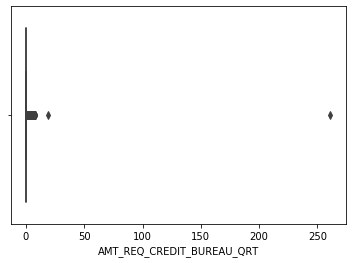

In [19]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [20]:
#checking the quantile to understand the extreme value differnce
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.quantile([.75,.90,.99,1])

0.75      0.0
0.90      1.0
0.99      2.0
1.00    261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [21]:
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.median()

0.0

Since the variable AMT_REQ_CREDIT_BUREAU_QRT has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 2 and 100 percentile has value 261. Which is an outlier, hence we can impute median value for this variable.

<b> for AMT_REQ_CREDIT_BUREAU_DAY </b>

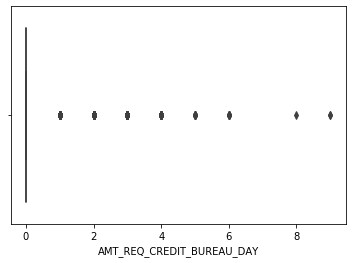

In [22]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [23]:
df_curr.AMT_REQ_CREDIT_BUREAU_DAY.quantile([.75,.90,.99,1])

0.75    0.0
0.90    0.0
0.99    0.0
1.00    9.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [24]:
df_curr.AMT_REQ_CREDIT_BUREAU_DAY.median()

0.0

Since the variable AMT_REQ_CREDIT_BUREAU_DAY has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 0 and 100 percentile has value 9.Since there are outliers , hence we can impute median value for this variable.

<b> for AMT_REQ_CREDIT_BUREAU_WEEK

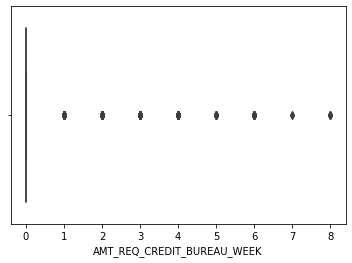

In [25]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [26]:
df_curr.AMT_REQ_CREDIT_BUREAU_WEEK.quantile([.75,.90,.99,1])

0.75    0.0
0.90    0.0
0.99    1.0
1.00    8.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [27]:
df_curr.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

Since the variable AMT_REQ_CREDIT_BUREAU_DAY has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 1 and 100 percentile has value 8. Since it has outliers, hence we can impute MEDIAN value for this variable.

<b> for AMT_REQ_CREDIT_BUREAU_MON

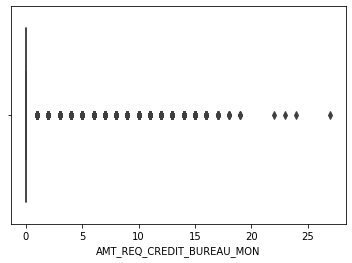

In [28]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [29]:
df_curr.AMT_REQ_CREDIT_BUREAU_MON.quantile([.75,.90,.99,1])

0.75     0.0
0.90     1.0
0.99     4.0
1.00    27.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [30]:
df_curr.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

Since the variable AMT_REQ_CREDIT_BUREAU_MON has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 4 and 100 percentile has value 27. Since there are outliers , hence we can impute with MEDIAN value for this variable.

<b> for AMT_REQ_CREDIT_BUREAU_YEAR

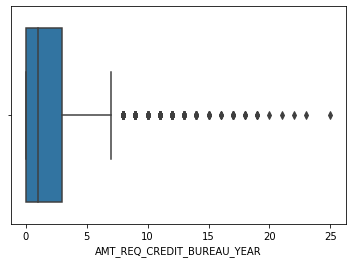

In [31]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [32]:
df_curr.AMT_REQ_CREDIT_BUREAU_YEAR.quantile([.75,.90,.99,1])

0.75     3.0
0.90     4.0
0.99     8.0
1.00    25.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [33]:
df_curr.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

Since the variable AMT_REQ_CREDIT_BUREAU_MON has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 8 and 100 percentile has value 25. Since there are outliers , hence we can impute with MEDIAN value for this variable

<b> for AMT_REQ_CREDIT_BUREAU_HOUR

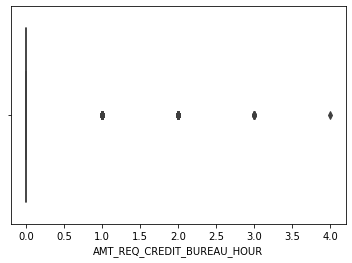

In [34]:
sns.boxplot(df_curr['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [35]:
df_curr.AMT_REQ_CREDIT_BUREAU_HOUR.quantile([.75,.90,.99,1])

0.75    0.0
0.90    0.0
0.99    0.0
1.00    4.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [36]:
df_curr.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

Since the variable AMT_REQ_CREDIT_BUREAU_HOUR has outliers which is evident through graph and the quantile functions, where the 99 percentile has value 0 and 100 percentile has value 4. Since there are outliers , hence we can impute with MEDIAN value for this variable

<b> 3. for EXT_SOURCE_3 and EXT_SOURCE_2 float variables with null % as 0.23 and 19.76% respectively </b>

In [37]:
#checking null values
df_curr.EXT_SOURCE_3.isnull().sum()

60965

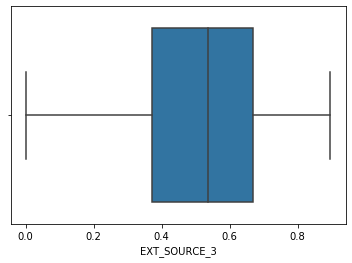

In [38]:
# checking for outliers in EXT_SOURCE_3 using box plot
sns.boxplot(df_curr['EXT_SOURCE_3'])
plt.show()

In [39]:
# to find the descriptive stat values for the EXT_SOURCE_3 variable
df_curr['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Since EXT_SOURCE_3 has no outliers in the data, this can be imputed with the MEAN value

In [40]:
#  checking null values in EXT_SOURCE_2
df_curr.EXT_SOURCE_2.isnull().sum()

660

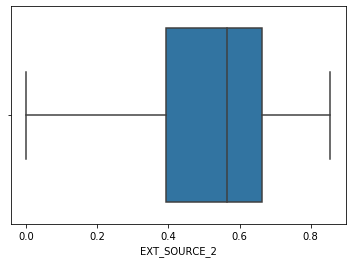

In [41]:
# checking for outliers in EXT_SOURCE_2 using box plot
sns.boxplot(df_curr['EXT_SOURCE_2'])
plt.show()

In [42]:
# to find the descriptive stat values for the EXT_SOURCE_2 variable
print(round(df_curr['EXT_SOURCE_2'].describe(),2))

print("\n Mean value is",round(df_curr['EXT_SOURCE_2'].mean(),2))

count    306851.00
mean          0.51
std           0.19
min           0.00
25%           0.39
50%           0.57
75%           0.66
max           0.85
Name: EXT_SOURCE_2, dtype: float64

 Mean value is 0.51


Since EXT_SOURCE_2 has no outliers in the data, this can be imputed with the MEAN value

<b> 4. for variable AMT_ANUITY  

In [43]:
df_curr.AMT_ANNUITY.isnull().sum()

12

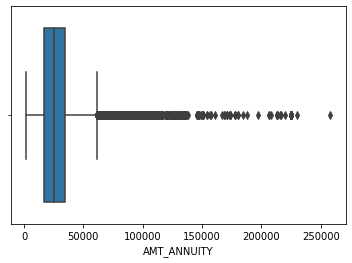

In [44]:
sns.boxplot(df_curr.AMT_ANNUITY)
plt.show()

In [45]:
df_curr.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [46]:
df_curr.AMT_ANNUITY.median()

24903.0

This variable has outliers, the graph becomes skewed hence we need to take median. As median is not affected by the outliers.
Hence, in this case we can impute null values with median.

<b> 5. for variable AMT_GOODS_PRICE </b>

In [47]:
df_curr.AMT_GOODS_PRICE.isnull().sum()

278

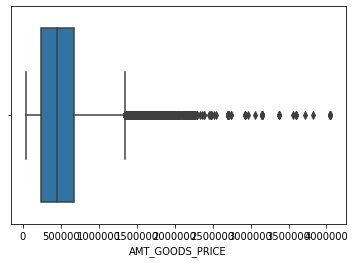

In [48]:
sns.boxplot(df_curr.AMT_GOODS_PRICE)
plt.show()

In [49]:
round(df_curr.AMT_GOODS_PRICE.describe(),2)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

AMT_GOODS_PRICE has 278 null values and also shows outliers,in this case distribution becomes more skewed we can impute null values with MEDIAN. As median is not affected by the outliers. 

<b> 6. for variable NAME_TYPE_SUITE

In [50]:
# checking null values for NAME_TYPE_SUITE
df_curr.NAME_TYPE_SUITE.isnull().sum()

1292

In [51]:
df_curr.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In  NAME_TYPE_SUITE column there are 1292 null value rows.This accounts to abount 81% of the missing values.The missing value of this variable can be handled by imputing with the most frequently repeated data "UNACCOMPANIED" as this column describes the "Who was accompanying client when he was applying for the loan"

<b> 7. for ORGANIZATION_TYPE column with XNA values

In [52]:
# checking the values of the ORGANIZATION_TYPE column
df_curr['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

ORGANIZATION_TYPE has 55374 XNA values which implies it is NA or null value. Since Business Entity Type 3 is most repeated, we can impute the XNA values with the most frequent organization type i.e BUSINESS ENTITY TYPE 3.

<b> 8. for CODE_GENER with XNA value

In [53]:
#checking value counts for CODE_GENDER
df_curr['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since females are in majority we can update and replace XNA with FEMALE. 

# 4. Checking row wise missing values 

In [54]:
df_curr.isnull().sum(axis=1)

0         0
1         1
2         0
3         7
4         1
         ..
307506    7
307507    8
307508    0
307509    0
307510    0
Length: 307511, dtype: int64

In [55]:
df_a_sample= df_curr[1:55000].copy()
round((df_a_sample.isnull().sum(axis=1)/len(df_a_sample.index))*100,2)

1        0.00
2        0.00
3        0.01
4        0.00
5        0.00
         ... 
54995    0.00
54996    0.00
54997    0.00
54998    0.00
54999    0.00
Length: 54999, dtype: float64

# 5. DROPPING UNNECESSARY COLUMNS

In [56]:
df_curr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#deleting unnecessary columns
del_columns= ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
              'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_WORK_REGION','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_WORK_REGION','FLAG_EMP_PHONE','FLAG_CONT_MOBILE',
             'FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']

In [58]:
df_curr.drop(columns=del_columns,axis=1,inplace=True)
print(df_curr.shape)

(307511, 35)


In [59]:
 df_curr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# 6. Check the datatype of the column and change if need be

In [60]:
# the following columns which count the days have negative columns. Days cant be negative hence this needs to converted into absolute values
df_curr[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [61]:
# converting all these columns into absolute values as days cant be negative
l= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in l:
    df_curr[i] = abs(df_curr[i])

df_curr[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458


In [62]:
# converting to int
df_curr['DAYS_REGISTRATION']= df_curr.DAYS_REGISTRATION.astype(int)

In [63]:
#datatype to int
df_curr.DAYS_REGISTRATION.dtype

dtype('int32')

In [64]:
df_curr[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']].head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
0,9461,637,2120,3648
1,16765,1188,291,1186
2,19046,225,2531,4260
3,19005,3039,2437,9833
4,19932,3038,3458,4311


<b> changing the datatype of AMT_REQ_CREDIT_BUREAU_QRT from float to int as this indicates Number of enquiries to Credit Bureau <b>

In [65]:
#changing the datatype of AMT_REQ_CREDIT_BUREAU_QRT from float to int as this indicates Number of enquiries to Credit Bureau 
print("Null values are",df_curr.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
value = df_curr.AMT_REQ_CREDIT_BUREAU_QRT.median()
value

Null values are 41519


0.0

In [66]:
#from step 21 we can impute the values with the medAMT_REQ_CREDIT_BUREAU_QRTian of the data and then convert the datatypeto INT.
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_curr.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [67]:
# converting to int datatype
df_curr['AMT_REQ_CREDIT_BUREAU_QRT']= df_curr.AMT_REQ_CREDIT_BUREAU_QRT.astype(int)
df_curr.AMT_REQ_CREDIT_BUREAU_QRT.head()

0    0
1    0
2    0
3    0
4    0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int32

In [68]:
df_curr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# 7. BINNING - variable DAYS_BIRTH, AMT_INCOME_TOTAL and AMOUNT_CREDIT

In [69]:
df_curr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,Government,0.555912,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,Religion,0.322738,0


<b>Based on the above data, we can observe that, AMT_INCOME_TOTAL which indicates the income of the client - This can be grouped into 4 groups<br>
And, DAYS_BIRTH which indicates Client's age in days at the time of application- this can be grouped into 4 groups <br> <b>

The above two variables can now be used for binning

In [70]:
# DAYS_BIRTH indicates the client's age in days hence creating a new column age_in_years to group the data in simpler way
# adding new column age_in_years
df_curr["age_in_years"] = df_curr["DAYS_BIRTH"]//365 

In [71]:
df_curr["age_in_years"] = df_curr["age_in_years"].astype(int)
df_curr["age_in_years"].head()

0    25
1    45
2    52
3    52
4    54
Name: age_in_years, dtype: int32

Binning the "age_in_years" into 4 groups <br>
young: [18;30] <br>
middle age: [31-45]<br>
above middle age: [46-64]<br>
senior citizen: [64-max]

In [72]:
print("max age is", max(df_curr["age_in_years"]))
print("min age is",min(df_curr["age_in_years"]))
bin_width = int(max(df_curr["age_in_years"]) - min(df_curr["age_in_years"])) // 4
print("bin width is",bin_width)

max age is 69
min age is 20
bin width is 12


In [73]:
bin_label = ['young','middle age','above_middle age','senior']
bins = range(min(df_curr["age_in_years"]), max(df_curr["age_in_years"])+1, bin_width)
pd.cut(df_curr["age_in_years"], bins,labels=bin_label)

0                    young
1         above_middle age
2         above_middle age
3         above_middle age
4         above_middle age
                ...       
307506               young
307507    above_middle age
307508          middle age
307509               young
307510    above_middle age
Name: age_in_years, Length: 307511, dtype: category
Categories (4, object): [young < middle age < above_middle age < senior]

In [74]:
#creating new column in df_curr-> application data to store this binned data
df_curr["bin_age"]= pd.cut(df_curr["age_in_years"], bins,labels=bin_label)
df_curr[["age_in_years","bin_age"]].head()

,age_in_years,bin_age
0,25,young
1,45,above_middle age
2,52,above_middle age
3,52,above_middle age
4,54,above_middle age


Since columns age_in_years (calcludated from DAYS_BIRTH/365) and DAYS_BIRTH represent the age of the client in years and days respectively. These are reduant copies and hence deletion of DAYS_BIRTH doesn't impact the analysis.

In [75]:
df_curr.drop(columns="DAYS_BIRTH",axis=1,inplace=True)

<B> binning the variable AMT_INCOME_TOTAL into LOW,MIDDLE_INCOME, ABOVE_MIDDLE_INCOME,HIGH </b>

In [76]:
df_curr.AMT_INCOME_TOTAL.isnull().sum()

0

In [77]:
df_curr["AMT_INCOME_TOTAL"] = df_curr["AMT_INCOME_TOTAL"].astype(int)
df_curr["AMT_INCOME_TOTAL"].dtype

dtype('int32')

In [78]:
#creating new varioble income_group in df_curr to store the grouped AMT_TOTAL_INCOME
q_labels = ['low', 'middle','above_middle','high']
df_curr["income_group"] = pd.qcut(df_curr["AMT_INCOME_TOTAL"],q=[0,.25,.5,.75,.99],labels=q_labels)
df_curr[["AMT_INCOME_TOTAL","income_group"]].head()

,AMT_INCOME_TOTAL,income_group
0,202500,above_middle
1,270000,high
2,67500,low
3,135000,middle
4,121500,middle


<b> creating bins for AMT_CREDIT column<b>

In [79]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
Range = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','<900000']

df_curr['AMT_CREDIT_RANGE']=pd.cut(df_curr['AMT_CREDIT'],bins=bins,labels=Range)

In [80]:
df_curr['AMT_CREDIT_RANGE'].head()

0    400000-450000
1          <900000
2         0-150000
3    300000-350000
4    500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): [0-150000 < 150000-200000 < 200000-250000 < 250000-300000 ... 750000-800000 < 800000-850000 < 850000-900000 < <900000]

# 8. Filling XNAN values in ORGANIZATION_TYPE and CODE_GENDER

In [81]:
#There are some columns where the value is mentioned as 'XNA' which means 'Not Available'.
# Therefore we have to handle those either by imputing some values or deleting them
df_curr.loc[df_curr['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='Business Entity Type 3'
df_curr.loc[df_curr['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [82]:
df_curr.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15687
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_WORK_PHONE                     2
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR

# 9. DATA IMBALANCE

In [83]:
# taking the sample data here as there are memory issues while executing steps
df_curr.shape
#df_curr_s = df_curr[:120000]

(307511, 38)

In [84]:
# Divide the dataset inot the two : target=1(client with payment difficulties) and target=0(all other)
df_curr_Target0 = df_curr[df_curr["TARGET"]==0]

In [85]:
df_curr_Target1 = df_curr[df_curr["TARGET"]==1]

In [86]:
#printing the shape Target0
df_curr_Target0.shape

(282686, 38)

In [87]:
#printing the shape for Target1
df_curr_Target1.shape

(24825, 38)

In [88]:
# Calculating the Data Imbalance percentage
Data_Imbalance = round(100 *(df_curr.TARGET.value_counts()/len(df_curr)),2)
print(Data_Imbalance)

0    91.93
1     8.07
Name: TARGET, dtype: float64


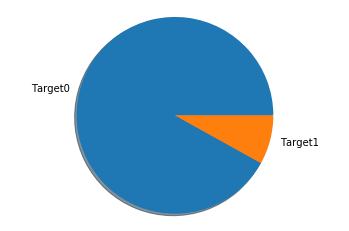

In [89]:
labels = 'Target0', 'Target1'
fig,ax = plt.subplots()
ax.pie(Data_Imbalance, labels=labels,shadow=True)
ax.axis('equal')
plt.show()

**The results shows that data is highly imbalance  with 92% having no payment difficulties. Only 8 % clients are facing payment difficulties**.

# 10. Univariate analysis with respect to Target column

<b> (i) FOR income_group 

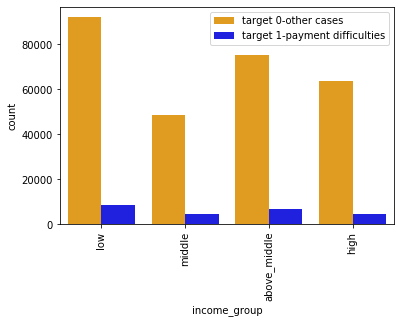

In [90]:
# Categorical variable: income_group
palette_colors = {0: "orange", 1: "blue"}
sns.countplot(x='income_group',hue='TARGET',data=df_curr,palette=palette_colors)
plt.xticks(rotation=90)
plt.legend(['target 0-other cases','target 1-payment difficulties'])
plt.show()

<b> It is evident from the above visualization that customers who are in low income and above-middle  group faced difficulties in paying the loan . Such clients usually default on their loans.


<b> (ii) FOR ORGANIZATION TYPE:

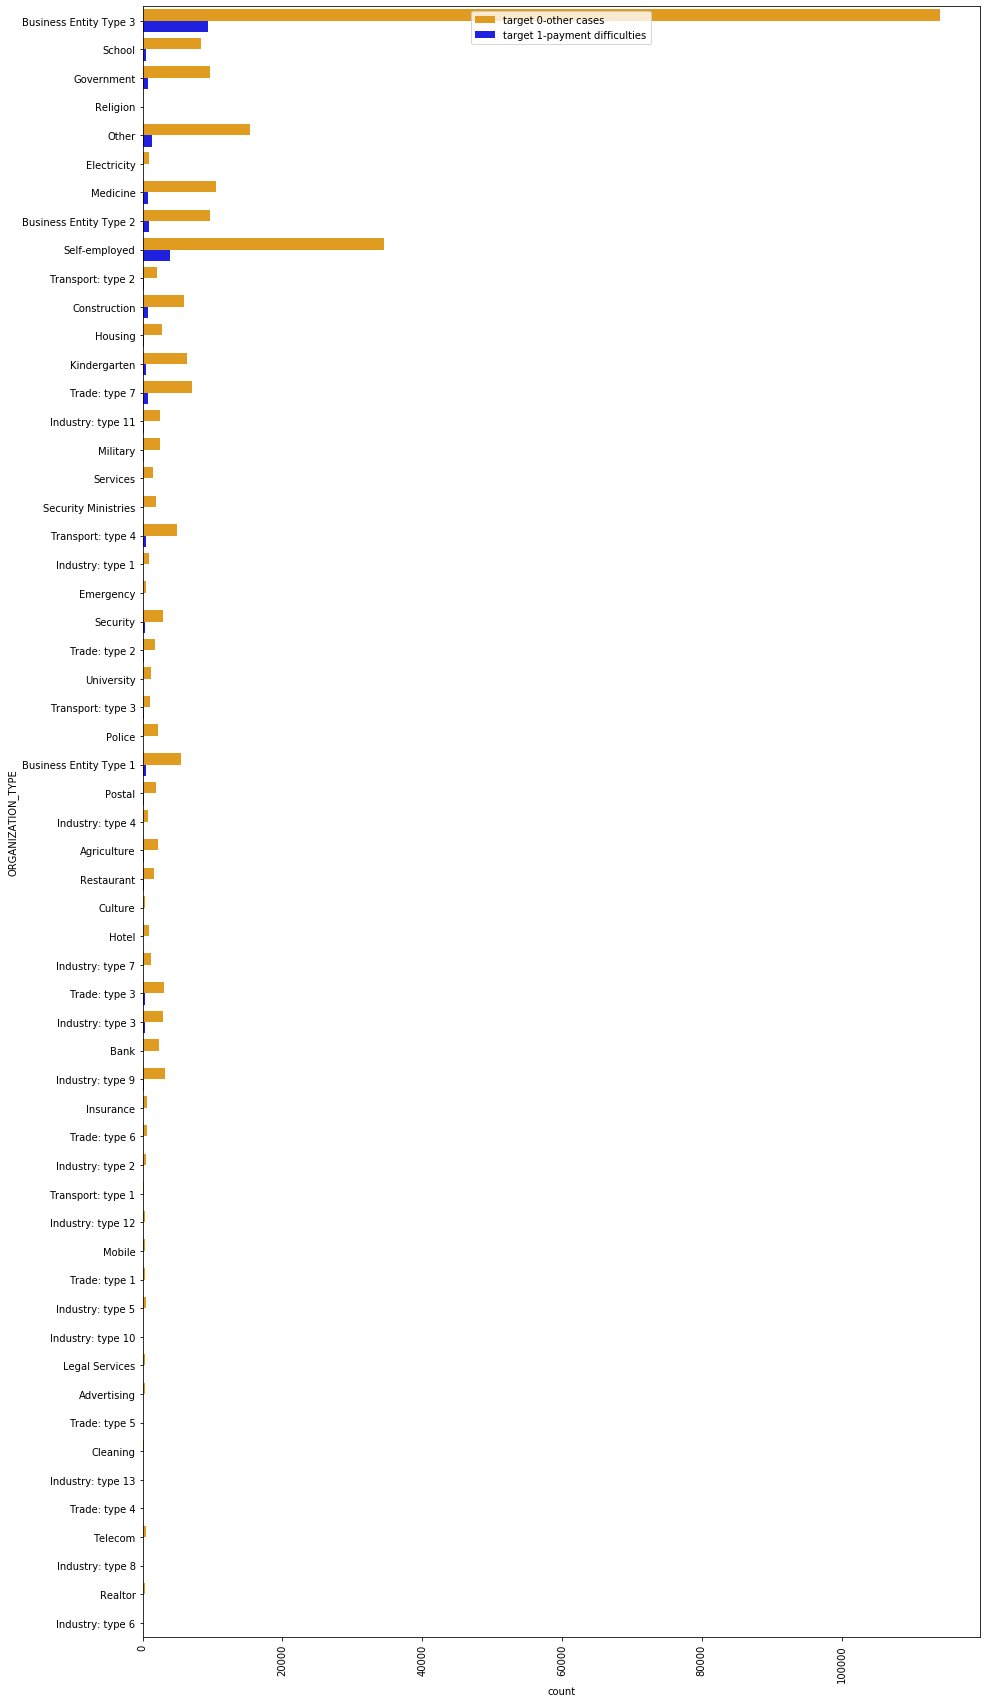

In [91]:
# Categorical variable: ORGANIZATION_TYPE
plt.figure(figsize=(15,30)) 
palette_colors = {0: "orange", 1: "blue"}
sns.countplot(y='ORGANIZATION_TYPE',hue='TARGET',data=df_curr,palette=palette_colors)
plt.xticks(rotation=90)
plt.legend(['target 0-other cases','target 1-payment difficulties'],loc='upper center')
plt.show()

**The above graph shows that the clients who are engaged in Business Entity Type 3 and are  Self employed faced problems in clearing their dues. Therefore, customer financial institution should focus on other organization_Type such as Government, Insurance and Industry-type 3 that hardly default on their loans**.


 <b> (iii) For Categorical variables 'NAME_CONTRACT_TYPE' , 'CODE_GENDER' , 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE'

In [92]:
#for categorical variables
categories = ['NAME_CONTRACT_TYPE' , 'CODE_GENDER' , 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE']
list(enumerate(categories))

[(0, 'NAME_CONTRACT_TYPE'),
 (1, 'CODE_GENDER'),
 (2, 'FLAG_OWN_CAR'),
 (3, 'FLAG_OWN_REALTY'),
 (4, 'NAME_INCOME_TYPE'),
 (5, 'NAME_EDUCATION_TYPE'),
 (6, 'NAME_HOUSING_TYPE'),
 (7, 'NAME_FAMILY_STATUS'),
 (8, 'OCCUPATION_TYPE')]

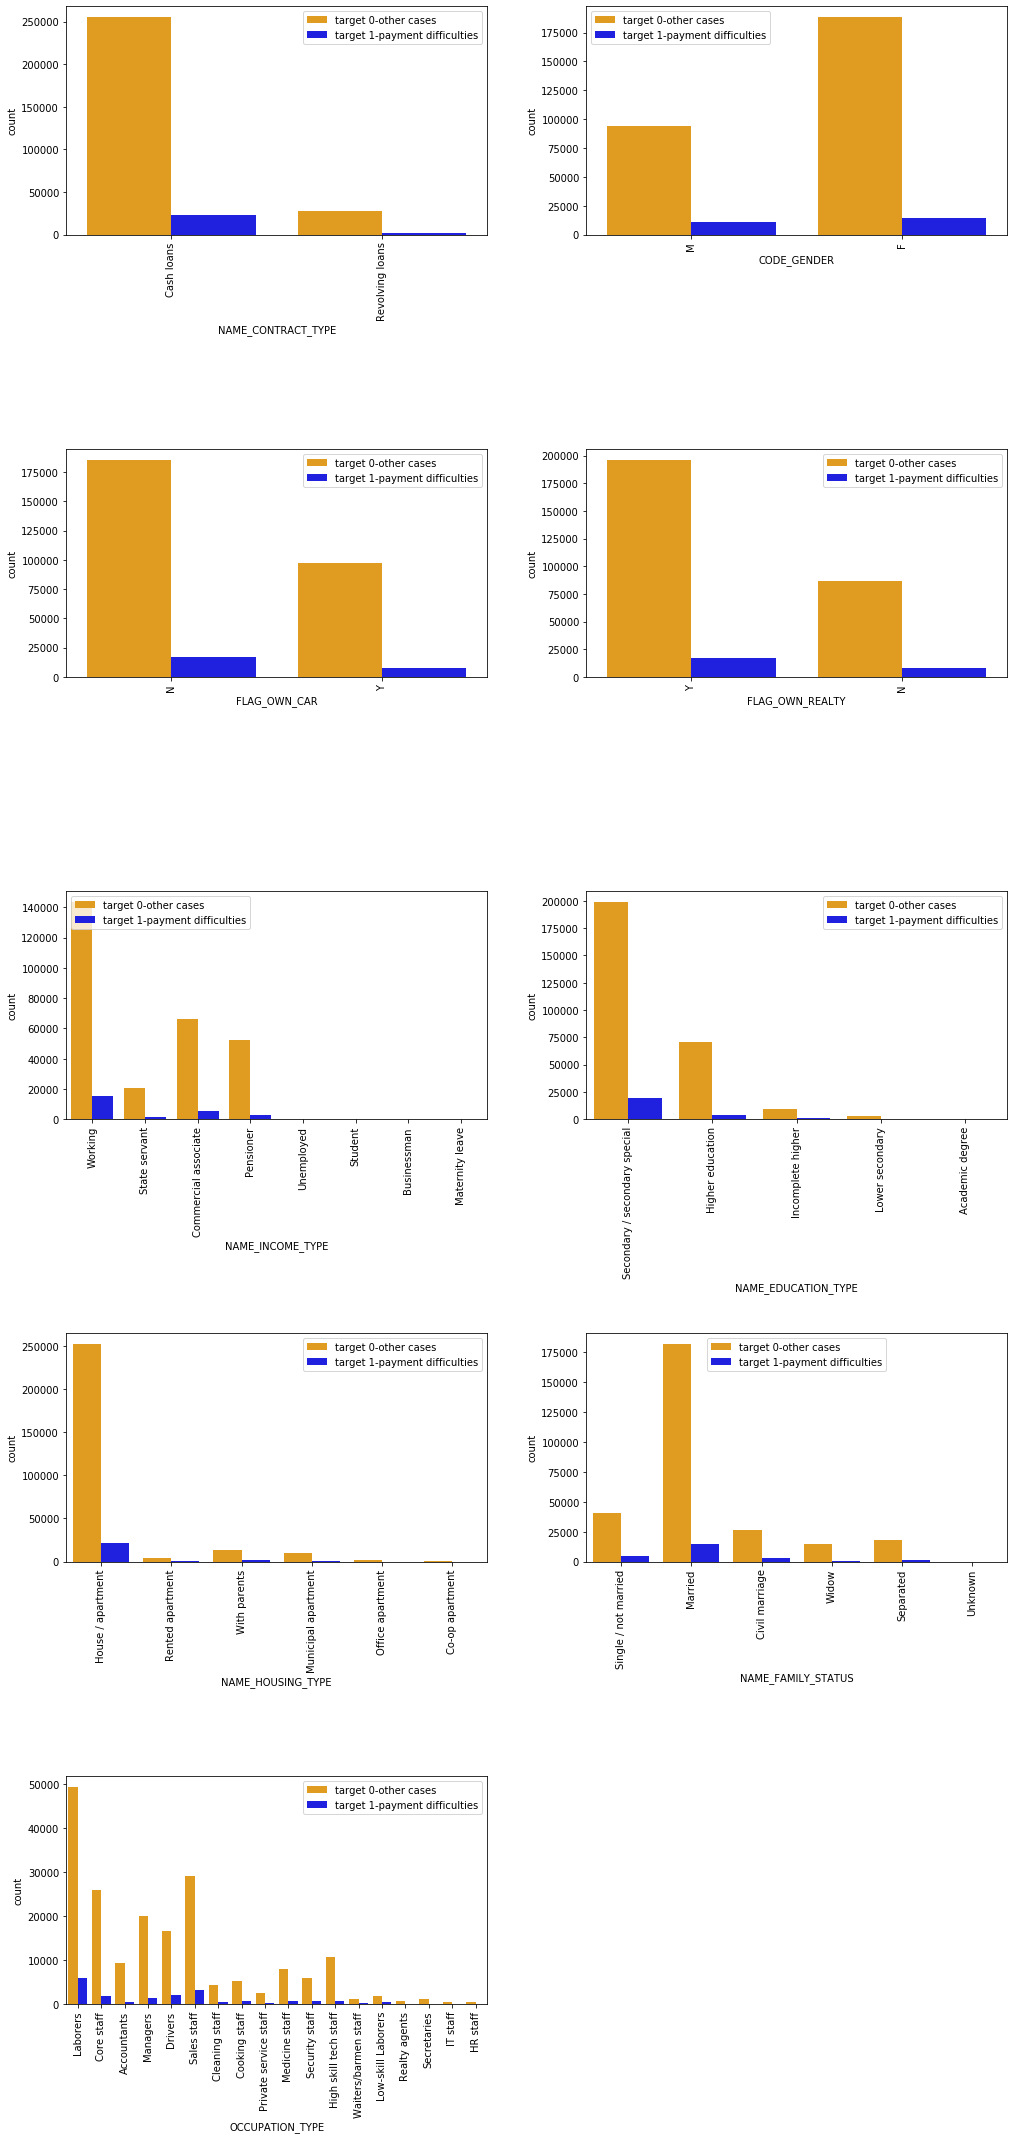

In [93]:
plt.figure(figsize = (15,35))
palette_colors = {0: "orange", 1: "blue"}
for i in enumerate(categories):
    plt.subplot(6,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.countplot(x=i[1],hue='TARGET',data=df_curr,palette=palette_colors)
    plt.legend(['target 0-other cases','target 1-payment difficulties'])
    plt.xticks(rotation=90)
plt.show()

Analysis for the above visualizations:

1) In NAME_CONTRACT_TYPE graph - Clients who are facing difficulties in paying their loans have opted for loan contract  where a fixed amount of cash is paid on a set date with the agreed interest rate to the financial institution on a monthly basis .Further, even the clients who are paying the installments on time preferred the cash loan facility that includes an amortization schedule, in which the principal is gradually reduced through installment payments over the course of time .There are very less number of customers who have availed revolving credit facility.

2) If OCCUPATION_TYPE graph-  all those who are engaged in jobs such as IT staff, HR staff, Secretaries and Realty agents are not facing any problems in making the payments. The graph indicates that amongst the given occupations, laborers tend to borrow more to meet their ends. At large, they are able to clear their debts. However, in relation to other occupations, this class along with sales staff faces the difficulty in clearing their dues on time.

3) In NAME_EDUCATION graph- If we look at the Education type (figure 4),  clients with secondary / secondary special education are not facing any problems in making the payments. 

4) In NAME_FAMILY_STATUS graph- payment diffculties is very less in case of widows and seperated clients compared to the married.

5) In CODE_GENDER graph- We can see that Females of more fall under Target 0 - other cases of payement made on time or late based on their convenience and due date.

And the population distribution of of most of the other categorical variables such as ,FLAG_OWN_CAR, FLAG_OWN_REALTY , NAME_,NAME_HOUSING_TYPE is same across the TARGET


<B> (iv) FOR NUMERICAL VARIABLES

In [94]:
Continuous = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','age_in_years','DAYS_REGISTRATION',
'DAYS_ID_PUBLISH','EXT_SOURCE_2', 'CNT_CHILDREN']

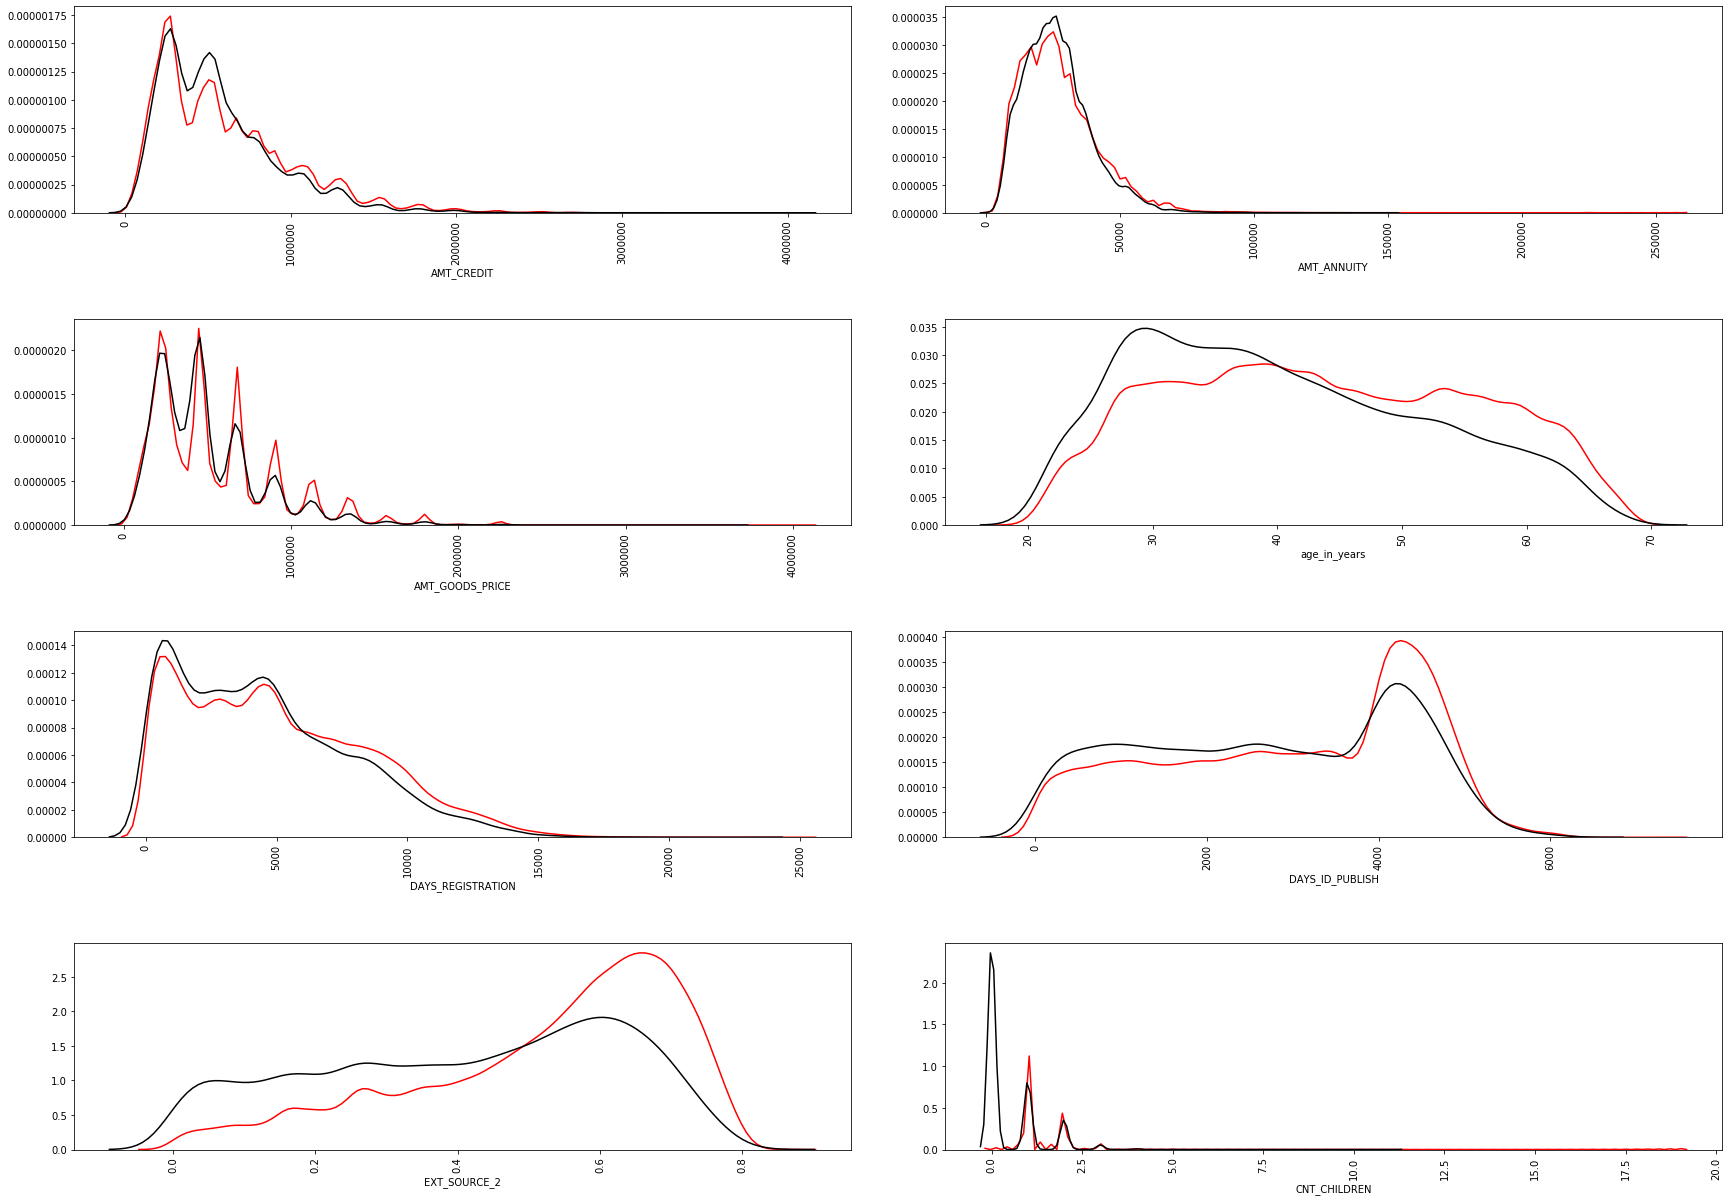

In [95]:
plt.figure(figsize=(25,30))  
try:
    for i in enumerate (Continuous):
        plt.subplot(7,2,i[0]+1)
        sns.distplot(df_curr_Target0[i[1]], hist = False , color = 'r')
        sns.distplot(df_curr_Target1[i[1]], hist = False , color = 'k')
        plt.tight_layout(pad=4.0)
        plt.xticks(rotation = 90)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(df_curr_Target0[i[1]], kde_kws={'bw': 1})
    elif str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(df_curr_Target1[i[1]], kde_kws={'bw': 1})
    
plt.show()

i)By looking at the age_in_years distribution, we can see that it varies evenly across the entire distribution. We can also say that those who default are generally younger as the Default population has higher frequencies for clients with lower DAYS_BIRTH.

(ii)The variables such as AMT_CREDIT, AMT_ANNUITY,DAYS_REGISTRATION etc followed the similar pattern across the TARGET. Further, as the client increases the credit amount, the default rate also increases and the vica-versa.

(iii) In case of CNT_CHILDREN, the distrubution shows that clients with no children are unable to clear their dues. This provides an interesting insight since it clears the myth that those who have more children usualyy default on their loans. But , here the results are opposite

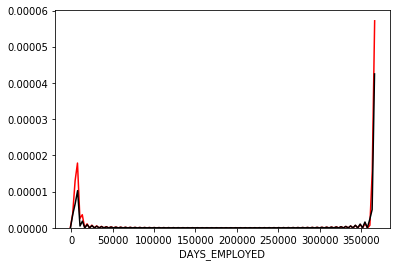

In [96]:
l=['DAYS_EMPLOYED']
sns.distplot(df_curr_Target0[l[0]], hist = False , color = 'r')
sns.distplot(df_curr_Target1[l[0]], hist = False , color = 'k')
plt.show()

For the DAYS_EMPLOYED, it could be observed that it exhibits erroneous data as there is a sudden spike in occurrences above 350,000 days. It could be included by mistake since it correponds to almost 1000 years which is not possible. Therefore , we need to replace such values with NAN to avoid biasness in the results.

# **11. BIVARIATE ANALYSIS** 

In [97]:
df_curr_Target0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'age_in_years', 'bin_age', 'income_group', 'AMT_CREDIT_RANGE'],
      dtype='object')

Below bivariate analysis is done for the variables across 2 groups i.e. <br>
-<b>Target1 group</b> wherein the client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample, <br>
-<b>Target0 group</b> wherein client payement belongs to all other cases- All other cases when the payment is paid on time

<b> 1. income_group and CODE_GENDER

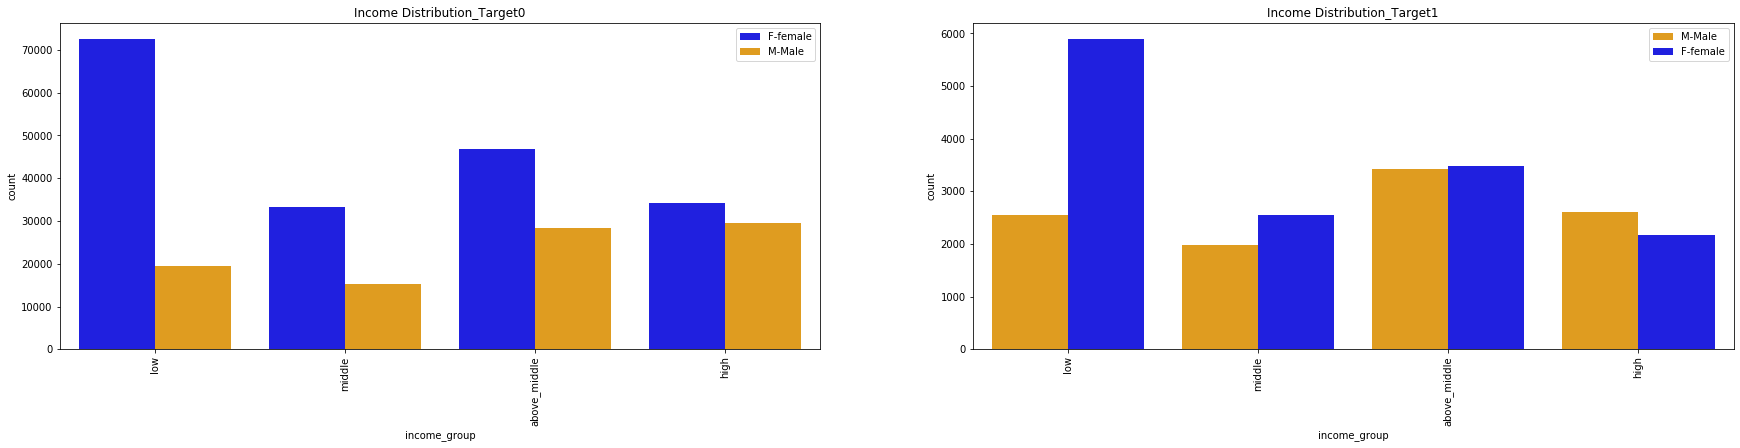

In [98]:
plt.figure(figsize = (30,6))
palette_colors = {'F':"BLUE",'M': "ORANGE"}
plt.subplot (1,2,1)
sns.countplot(x="income_group", hue="CODE_GENDER", data = df_curr_Target0,palette=palette_colors)
plt.title('Income Distribution_Target0')
plt.legend(['F-female','M-Male'])
plt.xticks(rotation = 90)

plt.subplot (1,2,2)
sns.countplot(x="income_group", hue="CODE_GENDER", data = df_curr_Target1,palette=palette_colors)
plt.title('Income Distribution_Target1')
plt.legend(['M-Male','F-female'])
plt.xticks(rotation = 90)
plt.show()

From the above graps, we can infer that <br>
- Within Target1 group (payment diffculties) Males belonging to Above_middle income group basically have higher payment difficulties,
whereas Males of Middle income group have less payment diffculties.Also the Females of low income group are more on verge to 
default the loan due to payment diffculties. <br>

- Within Target0 group (all other cases when payment made on time)-Men belonging to higher income group are most likely to make 
payments on time.

<b> 2. Name_Income_Type and Code_Gender

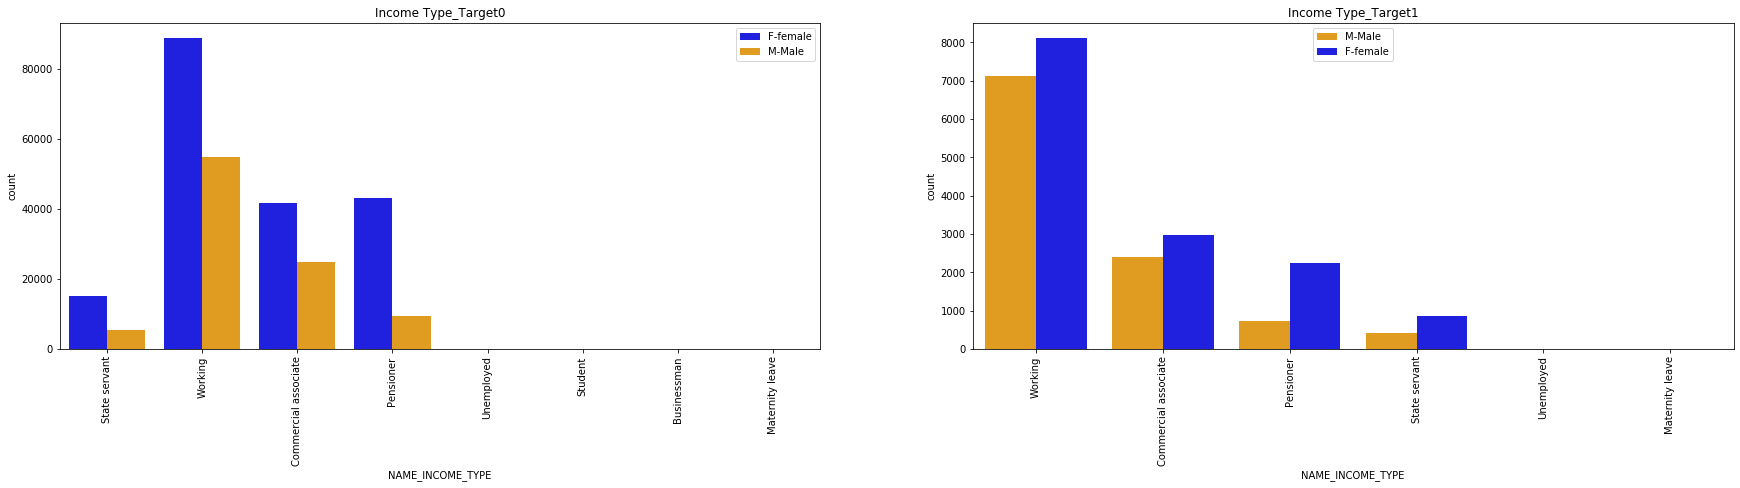

In [99]:
plt.figure(figsize = (30,6))
palette_colors = {'M': "orange", 'F': "blue"}
plt.subplot (1,2,1)
sns.countplot(x='NAME_INCOME_TYPE', hue="CODE_GENDER", data = df_curr_Target0,palette= palette_colors)
plt.title('Income Type_Target0')
plt.legend(['F-female','M-Male'])
plt.xticks(rotation = 90)

plt.subplot (1,2,2)
sns.countplot(x='NAME_INCOME_TYPE', hue="CODE_GENDER", data = df_curr_Target1,palette= palette_colors)
plt.title('Income Type_Target1')
plt.legend(['M-Male','F-female'])
plt.xticks(rotation = 90)
plt.show()

It is evident from the graph that Males across  all income_type i.e working, commercial associate, state servant etc are in better position to pay their loans.

<B> 3. Name_Contract_Type and Code_Gender

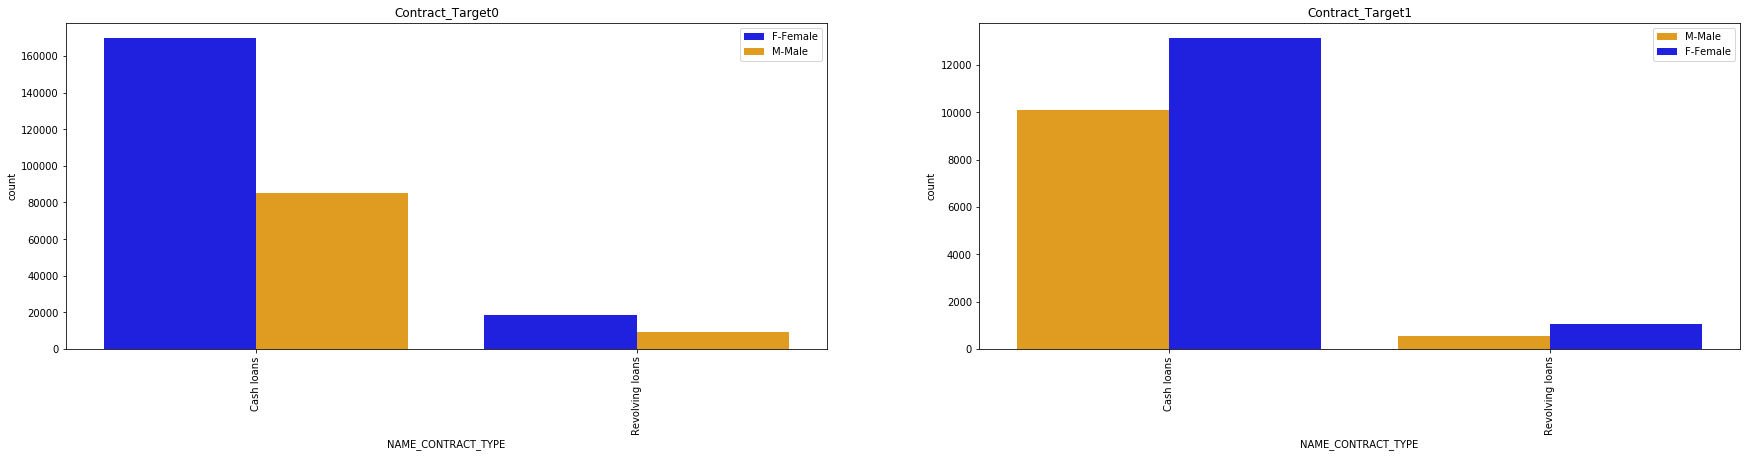

In [100]:
plt.figure(figsize = (30,6))
palette_colors = {'M':"orange", 'F':"blue"}
plt.subplot (1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE', hue="CODE_GENDER", data = df_curr_Target0,palette=palette_colors)
plt.title('Contract_Target0')
plt.xticks(rotation = 90)
plt.legend(['F-Female','M-Male'])


plt.subplot (1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE', hue="CODE_GENDER", data = df_curr_Target1,palette=palette_colors)
plt.title('Contract_Target1')
plt.xticks(rotation = 90)
plt.legend(['M-Male','F-Female'])
plt.show()


It is evident from the above graph that males prefer cash loans while females have engaged in revolving loans. However, males who have entered into both cash and revolving loans faced less diffiulty in paying their loans when compared to females.

<b> 4. Name_Family_Status and Amt_Credit

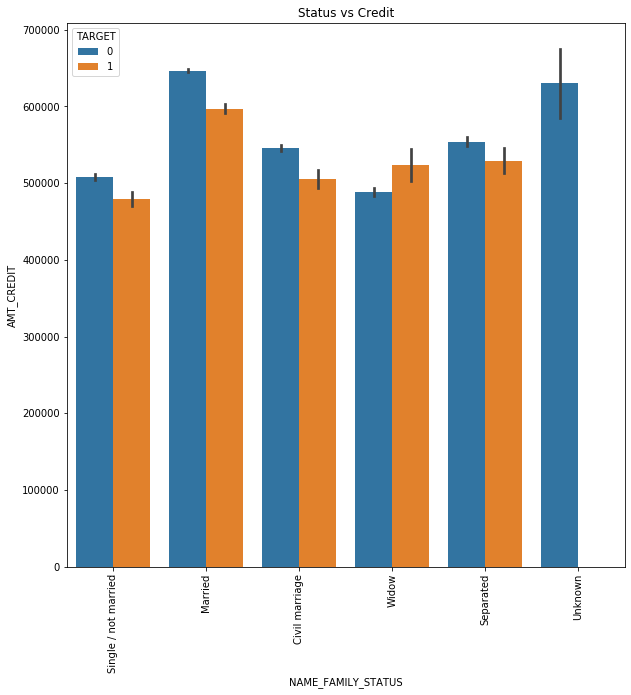

In [101]:
plt.figure(figsize = (10,10))
sns.barplot(x='NAME_FAMILY_STATUS', y="AMT_CREDIT", hue = "TARGET" , data = df_curr)
plt.title('Status vs Credit')
plt.xticks(rotation = 90)
plt.show()

The above graph shows that widows  usually default of their loans when compared to the other categories.

<b> 5. NAME_FAMILY_STATUS and AMT_INCOME_TOTAL

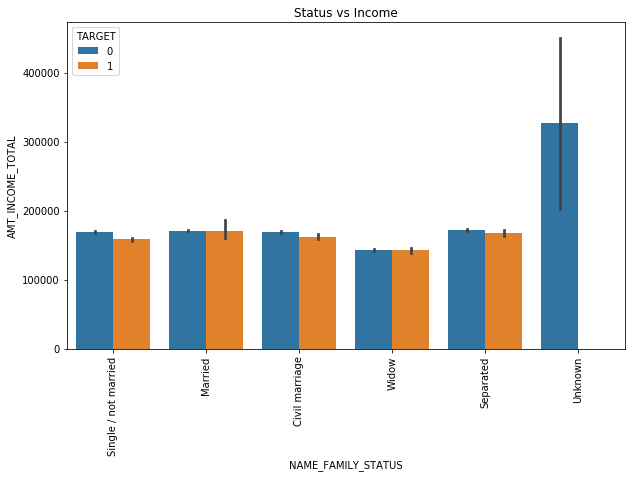

In [102]:
plt.figure(figsize = (10,6))
sns.barplot(x='NAME_FAMILY_STATUS', y="AMT_INCOME_TOTAL", hue = "TARGET" , data = df_curr)
plt.title('Status vs Income')
plt.xticks(rotation = 90)
#plt.legend(['0-other cases','1-payment difficulties'])
plt.show()

The given graph indicates that income is same across the  family status and their distribution is also same across the TARGET

<b> 6. OCCUPATION_TYPE vs AMT_CREDIT

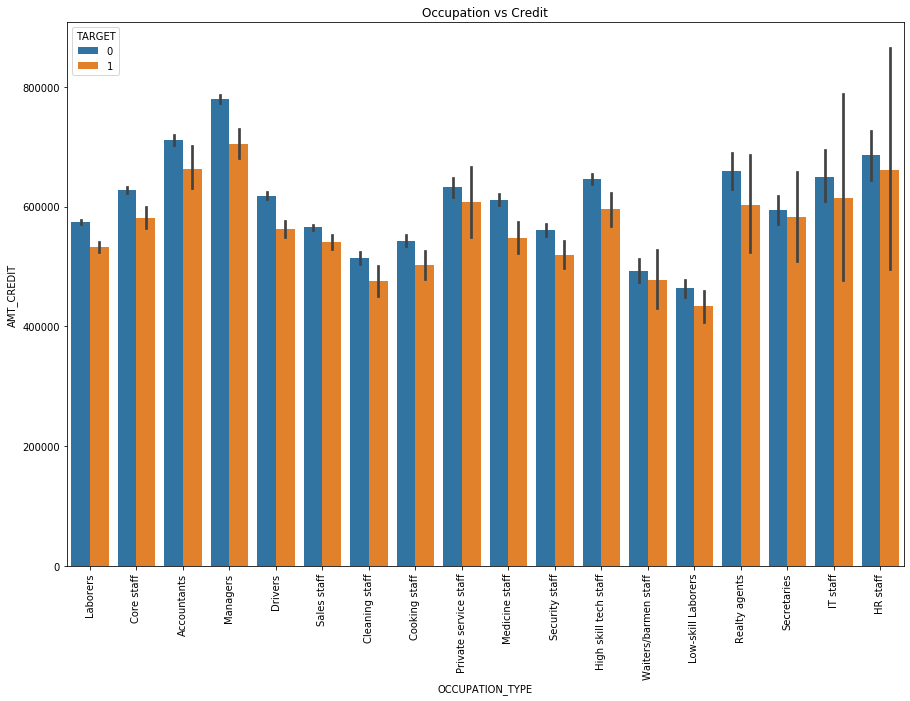

In [103]:
plt.figure(figsize = (15,10))
sns.barplot(x='OCCUPATION_TYPE', y="AMT_CREDIT", hue = "TARGET" , data = df_curr)
plt.title('Occupation vs Credit')
plt.xticks(rotation = 90)
plt.show()

The above graph illustrates that amongst the occupations, managers  followed by accountants have more credit as compared to others. However, both managers and accountants face problems in paying their loans. Most of the outliers are from IT and HR staff.  


<b> 7. OCCUPATION_TYPE and AMT_ANNUITY

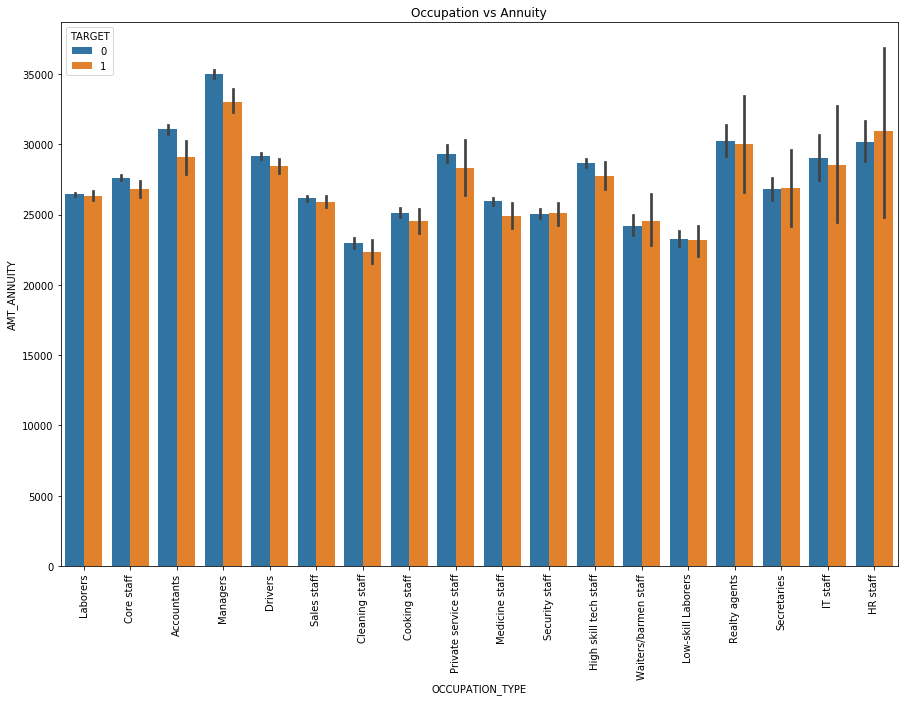

In [104]:
plt.figure(figsize = (15,10))
sns.barplot(x='OCCUPATION_TYPE', y="AMT_ANNUITY", hue = "TARGET" , data = df_curr)
plt.title('Occupation vs Annuity')
plt.xticks(rotation = 90)
plt.show()

The above graph illustrates that amongst the occupations, managers  followed by HR Staff that paid the annuity amount face problems in clearing their debts. Most of the outliers are from IT and HR staff.  


# 12. CORRELATION ANALYSIS

In [105]:
corr = df_curr_Target0.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
142,AMT_GOODS_PRICE,AMT_CREDIT,0.99
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
301,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
143,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
119,AMT_ANNUITY,AMT_CREDIT,0.77
514,age_in_years,DAYS_EMPLOYED,0.63
352,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.54
329,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54
118,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
141,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35


In [106]:
corr = df_curr_Target1.corr()
corrdf1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf1 = corrdf1.unstack().reset_index()
corrdf1.columns = ['Var1', 'Var2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)
corrdf1['Correlation'] = abs(corrdf1['Correlation'])
corrdf1.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
142,AMT_GOODS_PRICE,AMT_CREDIT,0.98
359,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
301,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
119,AMT_ANNUITY,AMT_CREDIT,0.75
143,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
514,age_in_years,DAYS_EMPLOYED,0.58
352,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.45
329,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.44
454,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.32
382,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,0.29


Correlation Matrix:
The above table displays the correlation between the top 10 variables across both the segmentation i.r Target0 and Target1. The top five correlation results are similar in both the segments . For instance, there is strong positive  correlation betweem AMT_GOODS_PRICE and AMT_CREDIT (0.99 and 0.98). It means that amount of credit will increase with the increase in the price of consumer goods. Similiarly , we observed high association between REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT (around 0.95 in both the segments). Further, ther is positive relation between the AMT_ANNUITY and AMT_CREDIT.This implies that the annuity amount increases with the increase in credit amount.However, in case of TARGET0 ,although there is association  between AMT_GOODS_PRICE and AMT_INCOME_TOTAL but  no  correlation is observed between these two variables in TARGET1. This means,  income of all those clients who are facing problems in clearing their debt has no relation with the loan taken for consumer goods  . Similalry, we observe 0.42 correlation between AMT_ANNUITY and AMT_TOTAL_INCOME in case of TARGET0 that implies that to some extent the annuity amount increases with the increase in client's income. However, no such relation is observed in case of TARGET1 , therefore, may be , such clients face problems in clearing their debts.

# 13.Dataset: Previous_application

In [107]:
df2_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [108]:
# columnwise null count for application data
df2_previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [109]:
df_p= round((df2_previous.isnull().sum()/len(df2_previous.index))*100,2)
print("column wise percentage in df- previous application data", df_p)

column wise percentage in df- previous application data SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE       

The columnwise null percentage shows that there are many columns with more than 40% missing values. However, all these colums are relevant. Therefore, istead of dropping we would try to impute the missing values by either mean, median , mode or 0.However, we can drop 2 columns i.e RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED since there are 99% of missing values
We are also droping NFLAG_INSURED_ON_APPROVAL since it seems to be irrelvant. We are also droping the 'RATE_DOWN_PAYMENT  variable since it  corresponds to the AMT_DOWN _PAYMENT

In [110]:
#dropping irrelvant columns
del_columns = ['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NFLAG_INSURED_ON_APPROVAL','RATE_DOWN_PAYMENT']

In [111]:
df2_previous.drop(columns=del_columns,axis=1,inplace=True)

In [112]:
df2_previous.shape

(1670214, 33)

# 14. Handling missing values in previous_application dataset

<b> for AMT_ANNUITY

In [113]:
# checking null values
df2_previous.AMT_ANNUITY.isnull().sum()

372235

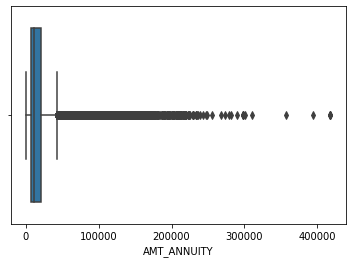

In [114]:
# plotting boxplot to check the outliers in this column
sns.boxplot(df2_previous['AMT_ANNUITY'])

In [115]:
# checking the quantile ranges for this
df2_previous.AMT_ANNUITY.quantile([0.5,0.7,0.8,0.9,0.95,0.99,1.00])

0.50     11250.0000
0.70     17783.1270
0.80     23638.5000
0.90     34703.8200
0.95     45336.7800
0.99     69685.7886
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

Since the variable AMT_ANNUITY has outliers which is evident through graph and quantile functions,  hence we can impute MEDIAN value for this variable.

<b> 2. for AMT_DOWN_PAYMENT 

In [116]:
# checking null values for this
df2_previous.AMT_DOWN_PAYMENT.isnull().sum()

895844

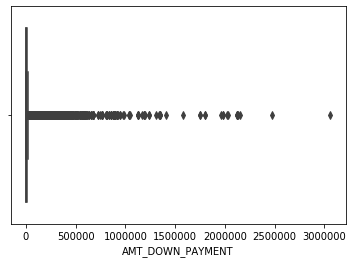

In [117]:
# plotting boxplot to understand the outliers
sns.boxplot(df2_previous['AMT_DOWN_PAYMENT'])
plt.show()

In [118]:
df2_previous.AMT_DOWN_PAYMENT.quantile([0.1,0.3,0.4,0.5,0.7,0.9,0.99,1.00])

0.10          0.000
0.30          0.000
0.40          0.000
0.50       1638.000
0.70       6057.000
0.90      17109.000
0.99      65930.895
1.00    3060045.000
Name: AMT_DOWN_PAYMENT, dtype: float64

It is evident from the above graph that there are outliers in the given data series. However, more than 50% of data is missing.
AMT_DOWN_PAYMENT indicates the down payment by the clients in their previous applications. There could be some customers wh0 have taken the loan without making any down payment. In such case, the missing value could be imputed by 0.

<B> 3. for AMT_GOODS_PRICE

In [119]:
#checking null values
df2_previous.AMT_GOODS_PRICE.isnull().sum()

385515

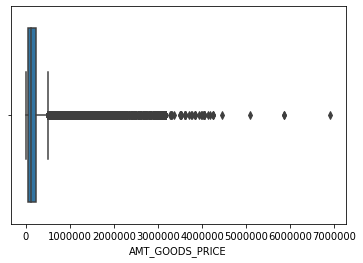

In [120]:
#ploting boxplot to understand the outliers
sns.boxplot(df2_previous['AMT_GOODS_PRICE'])

In [121]:
df2_previous.AMT_GOODS_PRICE.quantile([0.2,0.5,0.7,0.9,0.95,0.99,1])

0.20      45000.0
0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

With the outliers in the given series (AMT_GOODS_PRICE), it would be appropriate to replace the missing valies with MEDIAN.

<B> 4. FOR CNT_PAYMENT

In [122]:
df2_previous.CNT_PAYMENT.isnull().sum()

372230

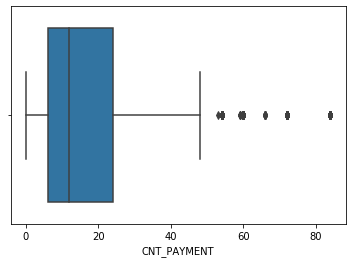

In [123]:
sns.boxplot(df2_previous['CNT_PAYMENT'])

In [124]:
df2_previous.CNT_PAYMENT.quantile([0.2,0.5,0.7,0.9,0.95,0.99,1.00])

0.20     6.0
0.50    12.0
0.70    18.0
0.90    36.0
0.95    48.0
0.99    60.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

Since the variable CNT_PAYMENT has outliers which is evident through graph and the quantile functions, where the 95 percentile has value 48 and 84 percentile has value 84.Since there are outliers , hence we can impute median value for this variable.

# 15 Checking the Datatype- in previous_application

In [125]:
df2_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  NAME_CASH_LOAN_PURPOSE       1670214 non-n

In [126]:
df2_previous.loc[:,'NFLAG_LAST_APPL_IN_DAY']=df2_previous.loc[:,'NFLAG_LAST_APPL_IN_DAY'].astype(object)

#Convert the following into absolute values as days cant be negative

df2_previous['DAYS_DECISION']= abs(df2_previous['DAYS_DECISION'])   
df2_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [127]:
# similaryly converting other days variables into absolute values 
df2_previous['DAYS_FIRST_DRAWING']= abs(df2_previous['DAYS_FIRST_DRAWING'])
df2_previous['DAYS_FIRST_DUE']= abs(df2_previous['DAYS_FIRST_DUE'])
df2_previous['DAYS_LAST_DUE']= abs(df2_previous['DAYS_LAST_DUE'])
df2_previous['DAYS_LAST_DUE_1ST_VERSION']= abs(df2_previous['DAYS_LAST_DUE_1ST_VERSION'])
df2_previous['DAYS_TERMINATION']= abs(df2_previous['DAYS_TERMINATION'])
df2_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


# 16 Columns with XNA and XAP (NA) in previous_application data

NAME_CASH_LOAN_PURPOSE,NAME_GOODS_CATEGORY,
NAME_PORTFOLIO,NAME_PRODUCT_TYPE,
NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP

<b> 1. for NAME_CASH_LOAN_PURPOSE

In [128]:
df2_previous['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In case of NAME_CASH_LOAN_PURPOSE there are 92661 XAP values and 677918 XNA values (not available). Hwere we can create a separate group for these missing values i.e UNSPECIFIED rather than imputing with any another value.

In [129]:
#filling the nan values
df2_previous.loc[df2_previous['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE']='UNSPECIFIED'
df2_previous.loc[df2_previous['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE']='UNSPECIFIED'
df2_previous['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

UNSPECIFIED                         0.958308
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby                               0.000033
Money for 

<b> 2. for NAMES_GOODS_CATEGORY

In [130]:
round(df2_previous['NAME_GOODS_CATEGORY'].value_counts(normalize = True),2)*100

XNA                         57.0
Mobile                      13.0
Consumer Electronics         7.0
Computers                    6.0
Audio/Video                  6.0
Furniture                    3.0
Photo / Cinema Equipment     1.0
Construction Materials       1.0
Clothing and Accessories     1.0
Auto Accessories             0.0
Jewelry                      0.0
Homewares                    0.0
Medical Supplies             0.0
Vehicles                     0.0
Sport and Leisure            0.0
Gardening                    0.0
Other                        0.0
Office Appliances            0.0
Tourism                      0.0
Medicine                     0.0
Direct Sales                 0.0
Fitness                      0.0
Additional Service           0.0
Education                    0.0
Weapon                       0.0
Insurance                    0.0
House Construction           0.0
Animals                      0.0
Name: NAME_GOODS_CATEGORY, dtype: float64

In case of NAME_GOODS_CATEGORY there are 57% of   XNA values (not available) accounting the highest percentage amongst the other variables. Therefore, we need to create  a separate group for these missing values i.e UNSPECIFIED rather than imputing with any another value.

In [131]:
df2_previous.loc[df2_previous['NAME_GOODS_CATEGORY']=='XNA','NAME_GOODS_CATEGORY']='UNSPECIFIED'
round(df2_previous['NAME_GOODS_CATEGORY'].value_counts(normalize = True),2)*100

UNSPECIFIED                 57.0
Mobile                      13.0
Consumer Electronics         7.0
Computers                    6.0
Audio/Video                  6.0
Furniture                    3.0
Photo / Cinema Equipment     1.0
Construction Materials       1.0
Clothing and Accessories     1.0
Auto Accessories             0.0
Jewelry                      0.0
Homewares                    0.0
Medical Supplies             0.0
Vehicles                     0.0
Sport and Leisure            0.0
Gardening                    0.0
Other                        0.0
Office Appliances            0.0
Tourism                      0.0
Medicine                     0.0
Direct Sales                 0.0
Fitness                      0.0
Additional Service           0.0
Education                    0.0
Weapon                       0.0
Insurance                    0.0
House Construction           0.0
Animals                      0.0
Name: NAME_GOODS_CATEGORY, dtype: float64

<b> 3. for NAME_PORTFOLIO

In [132]:
df2_previous['NAME_PORTFOLIO'].value_counts(normalize=True)

POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64

In case of NAME_PORTFOLIO there are 22% of missing values.Therefore, we need to create  a separate group for these missing values i.e UNSPECIFIED rather than merging it with some other group

In [133]:
df2_previous.loc[df2_previous['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO']='UNSPECIFIED'
round(df2_previous['NAME_PORTFOLIO'].value_counts(normalize = True),2)

POS            0.41
Cash           0.28
UNSPECIFIED    0.22
Cards          0.09
Cars           0.00
Name: NAME_PORTFOLIO, dtype: float64

<b> 4. For NAME_PRODUCT_TYPE

In [134]:
df2_previous['NAME_PRODUCT_TYPE'].value_counts(normalize = True)

XNA        0.636844
x-sell     0.273191
walk-in    0.089965
Name: NAME_PRODUCT_TYPE, dtype: float64

In case of NAME_PRODUCT_TYPE there are 63% of missing values. Therefore, we need to create  a separate group for these missing values i.e UNSPECIFIED rather than merging it with some other group

In [135]:
df2_previous.loc[df2_previous['NAME_PRODUCT_TYPE']=='XNA','NAME_PRODUCT_TYPE']='UNSPECIFIED'
round(df2_previous['NAME_PRODUCT_TYPE'].value_counts(normalize = True),2)

UNSPECIFIED    0.64
x-sell         0.27
walk-in        0.09
Name: NAME_PRODUCT_TYPE, dtype: float64

<b> 5 . for NAME_SELLER_INDUSTRY

In [136]:
df2_previous['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)

XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

Here, again there are 51% of missing values. Therefore, we need to create  a separate group for these missing values i.e UNSPECIFIED rather than merging it with some other group

In [137]:
df2_previous.loc[df2_previous['NAME_SELLER_INDUSTRY']=='XNA','NAME_SELLER_INDUSTRY']='UNSPECIFIED'
round(df2_previous['NAME_SELLER_INDUSTRY'].value_counts(normalize = True),2)

UNSPECIFIED             0.51
Consumer electronics    0.24
Connectivity            0.17
Furniture               0.03
Construction            0.02
Clothing                0.01
Industry                0.01
Auto technology         0.00
Jewelry                 0.00
MLM partners            0.00
Tourism                 0.00
Name: NAME_SELLER_INDUSTRY, dtype: float64

<B> 6 For NAME_YIELD_GROUP

In [138]:
df2_previous['NAME_YIELD_GROUP'].value_counts(normalize=True)

XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64

There are 30% of missing values (highest). Therefore, we need to create  a separate group for these missing values i.e UNSPECIFIED rather than merging it with some other group

In [139]:
df2_previous.loc[df2_previous['NAME_YIELD_GROUP']=='XNA','NAME_YIELD_GROUP']='UNSPECIFIED'
round(df2_previous['NAME_YIELD_GROUP'].value_counts(normalize = True),2)

UNSPECIFIED    0.31
middle         0.23
high           0.21
low_normal     0.19
low_action     0.06
Name: NAME_YIELD_GROUP, dtype: float64

# 17 MERGING WITH THE APPLICATION_DATA SET

Since we are interested in studying those variables in the previous application that are present in application data set to see the pattern, the inner merging wil be suitable for the analysis.

In [140]:
# creating the application data frame which is union of both application and prevous_application dataset
df_application =pd.merge(df_curr,df2_previous,how='inner',on='SK_ID_CURR',suffixes='_1')

In [141]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_QRT,age_in_years,bin_age,income_group,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE1,AMT_ANNUITY1,AMT_APPLICATION,AMT_CREDIT1,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE1,WEEKDAY_APPR_PROCESS_START1,HOUR_APPR_PROCESS_START1,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE1,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0,25,young,above_middle,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,UNSPECIFIED,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,UNSPECIFIED,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,UNSPECIFIED,Approved,746,XNA,XAP,Unaccompanied,Repeater,UNSPECIFIED,Cash,x-sell,Credit and cash offices,-1,UNSPECIFIED,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,UNSPECIFIED,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,UNSPECIFIED,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0
3,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,UNSPECIFIED,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,UNSPECIFIED,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0
4,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,Government,0.555912,0,52,above_middle age,low,0-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,UNSPECIFIED,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,UNSPECIFIED,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0


In [142]:
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  int32   
 8   AMT_CREDIT_                  1413701 non-null  float64 
 9   AMT_ANNUITY_                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_             1412493 non-null  float64 
 11  NAME_TYPE_SUITE_             1410175 non-null  object  
 12  NAME_INCOME_TYPE            

# 18. Renaming columns

In [143]:
df_application.rename(columns={'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE',
                                'AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START1' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START1':'HOUR_APPR_PROCESS_START',
                                'NAME_CONTRACT_TYPE1':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT1':'AMT_CREDIT_PREV','AMT_ANNUITY1':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START1':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START1':'HOUR_APPR_PROCESS_START_PREV'},inplace=True)
 

In [144]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_QRT,age_in_years,bin_age,income_group,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE1,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE1,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648,2120,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0,25,young,above_middle,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,UNSPECIFIED,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,UNSPECIFIED,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,UNSPECIFIED,Approved,746,XNA,XAP,Unaccompanied,Repeater,UNSPECIFIED,Cash,x-sell,Credit and cash offices,-1,UNSPECIFIED,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,UNSPECIFIED,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,UNSPECIFIED,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0
3,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186,291,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,0,45,above_middle age,high,<900000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,UNSPECIFIED,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,UNSPECIFIED,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0
4,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260,2531,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,Government,0.555912,0,52,above_middle age,low,0-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,UNSPECIFIED,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,UNSPECIFIED,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0


In [145]:
df_application.nunique()

SK_ID_CURR                          291057
TARGET                                   2
NAME_CONTRACT_TYPE                       2
CODE_GENDER                              2
FLAG_OWN_CAR                             2
FLAG_OWN_REALTY                          2
CNT_CHILDREN                            15
AMT_INCOME_TOTAL                      1876
AMT_CREDIT                            5496
AMT_ANNUITY                          13371
AMT_GOODS_PRICE_                       986
NAME_TYPE_SUITE_                         7
NAME_INCOME_TYPE                         7
NAME_EDUCATION_TYPE                      5
NAME_FAMILY_STATUS                       5
NAME_HOUSING_TYPE                        6
REGION_POPULATION_RELATIVE              81
DAYS_EMPLOYED                        12451
DAYS_REGISTRATION                    15606
DAYS_ID_PUBLISH                       6161
FLAG_MOBIL                               1
FLAG_WORK_PHONE                          2
OCCUPATION_TYPE                         18
CNT_FAM_MEM

# 19 Univariate Analysis on merged data set

(a) We have variable <b> NAME_CONTRACT_STATUS</b> which gives the Contract status (approved, cancelled, ...) of previous application. Hence,performing univariate analysis on this helps us to get the frequencet of the previous loan

In [146]:
df_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

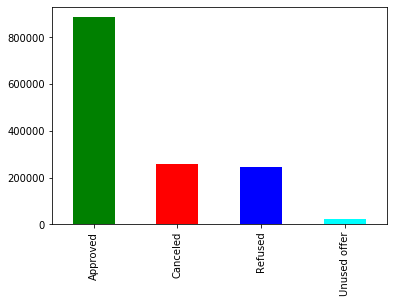

In [147]:
# bar plot to visualize the frequency
df_application['NAME_CONTRACT_STATUS'].value_counts().plot.bar(color=['green', 'red', 'blue', 'cyan'])

 From the above graph, we can observe that 63% of the clients has been approved the loan. While 17.8% applications got canceled and minute % of clients unused the offer

<b> (iv) CNT_PAYMENT- Term of previous credit at application of the previous application </b>

In [148]:
df_application['CNT_PAYMENT'].value_counts(normalize=True)

12.0    2.487673e-01
6.0     1.470960e-01
10.0    1.107522e-01
0.0     1.102452e-01
24.0    1.055384e-01
18.0    5.922522e-02
36.0    5.498840e-02
60.0    4.129914e-02
48.0    3.679118e-02
8.0     2.360351e-02
4.0     2.111184e-02
30.0    1.319400e-02
14.0    6.496230e-03
42.0    5.629523e-03
16.0    4.321782e-03
5.0     3.154124e-03
54.0    1.674668e-03
20.0    1.457765e-03
7.0     1.158621e-03
9.0     1.010404e-03
3.0     8.531498e-04
15.0    7.564474e-04
11.0    5.259885e-04
72.0    1.111625e-04
13.0    4.338050e-05
84.0    4.066922e-05
17.0    3.343913e-05
22.0    2.892033e-05
23.0    2.169025e-05
26.0    9.941364e-06
66.0    9.037604e-06
35.0    8.133843e-06
28.0    7.230083e-06
29.0    5.422562e-06
19.0    4.518802e-06
32.0    4.518802e-06
34.0    2.711281e-06
59.0    2.711281e-06
21.0    2.711281e-06
41.0    2.711281e-06
39.0    1.807521e-06
45.0    1.807521e-06
47.0    1.807521e-06
44.0    9.037604e-07
53.0    9.037604e-07
40.0    9.037604e-07
38.0    9.037604e-07
33.0    9.037

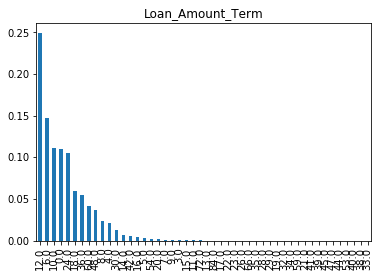

In [149]:
df_application['CNT_PAYMENT'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

It can be inferred from the above bar plot that:

Around 25% of the loans are 12 months term

# 20. Bivariate Analysis

<B> NAME_CONTRACT_STATUS and the NAME_CASH_LOAN_PURPOSE

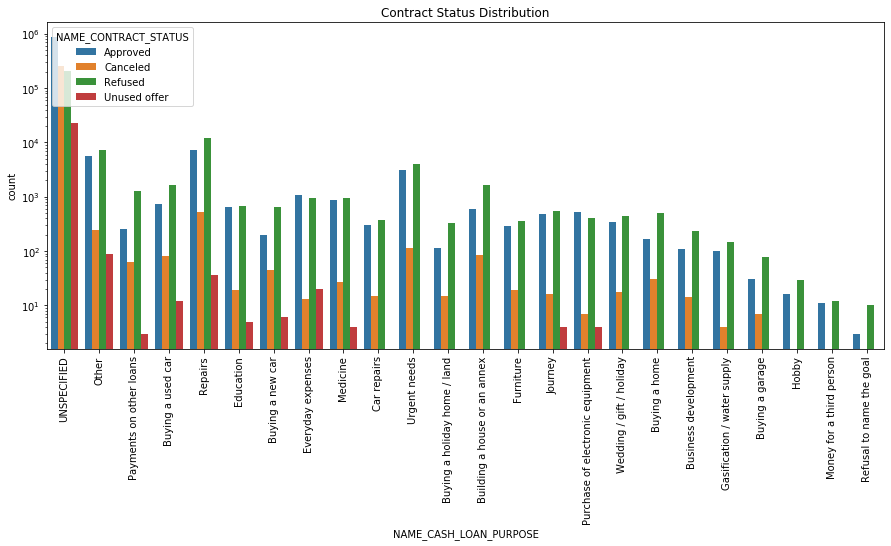

In [150]:
# Contract Status across the Population
plt.figure(figsize = (15,6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data = df_application)
plt.title('Contract Status Distribution')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

It is evident from the above graph that the major rejection of the loans came from unspecified group followed by  purpose 'repairs'. Another important insight is that for education purposes the number of approval and rejection are same.The purposes such as Payments on other loans and Buying a new car have more rejection than approval. Again, the major cancellatio came from the repairs and other puposed if we exclude the unspecified category.

 <B> Contract Status with respect to the target

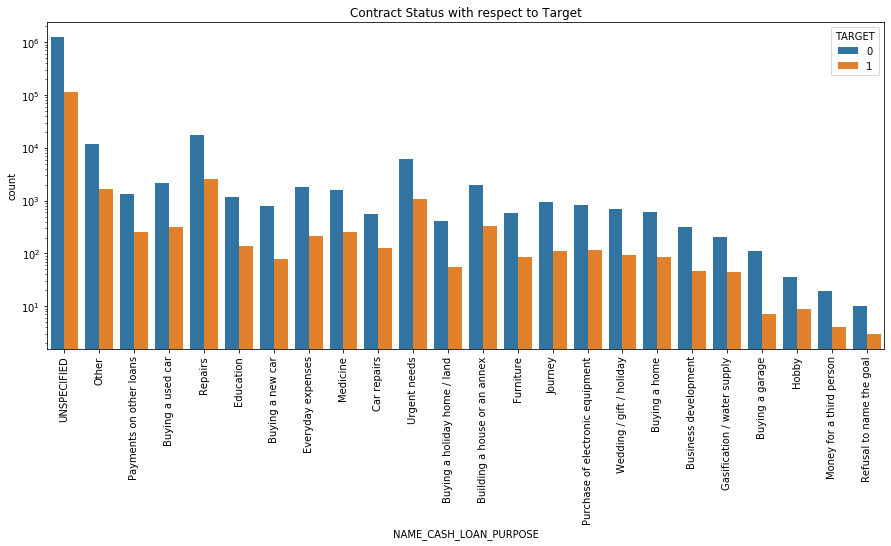

In [151]:
# Contract Status with respect to the target

plt.figure(figsize = (15,6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='TARGET', data = df_application)
plt.title('Contract Status with respect to Target')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

The categories that are facing difficulties in paying their debts are: unspecified purpose followed by repairs, other and urgent needs.Here we can focusmon those purposes for which clients are facing minimal difficulty in clearing their dues. This include the following purposes: Buying a garage, Buying a new car, Hobby, money for a third person, Education.

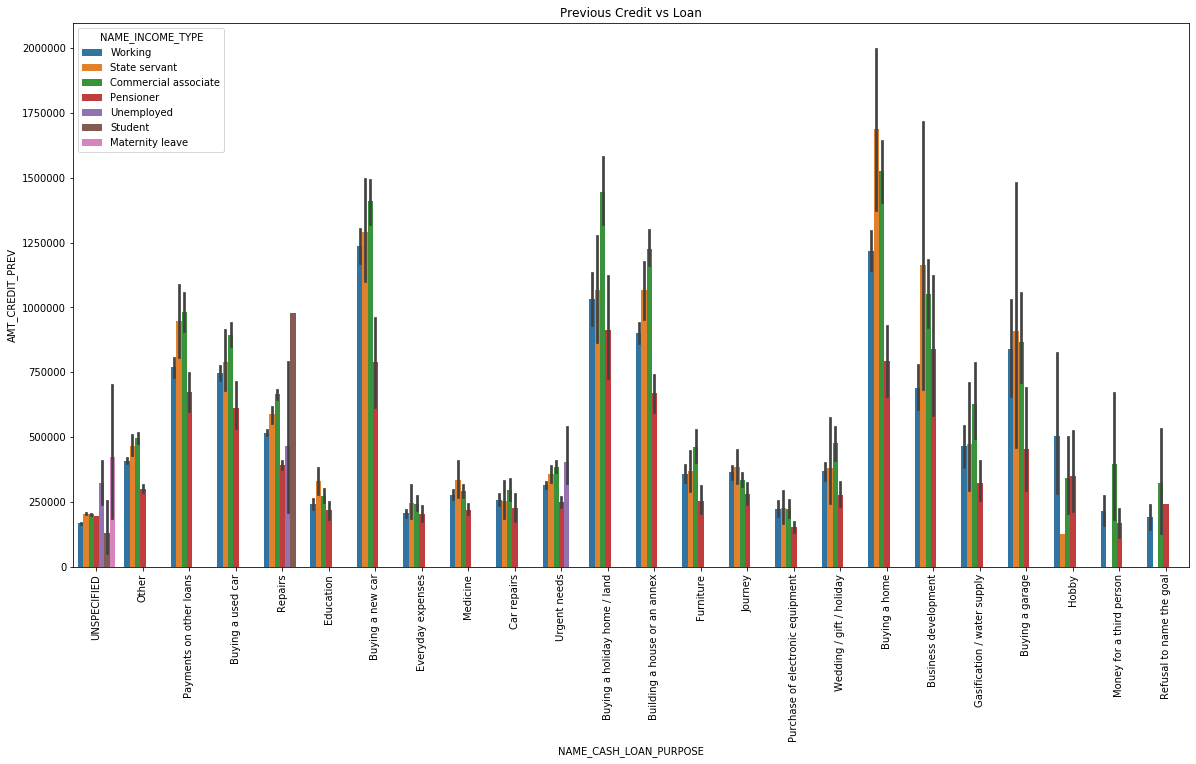

In [152]:
plt.figure(figsize = (20,10))
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_PREV', hue = 'NAME_INCOME_TYPE' , data = df_application)
plt.title('Previous Credit vs Loan')
plt.xticks(rotation = 90)
plt.show()

The above graph delineates that the credit ammount for buying home/land, buying gift /wedding/holoday, building  a house and buying a new car is much more than the other categories in the previous application. It clearly reflects that the bank should focus on such categories.Further, the working, commercial and the state servants have aplied for significant ammount of crdit to buy home, land and car.

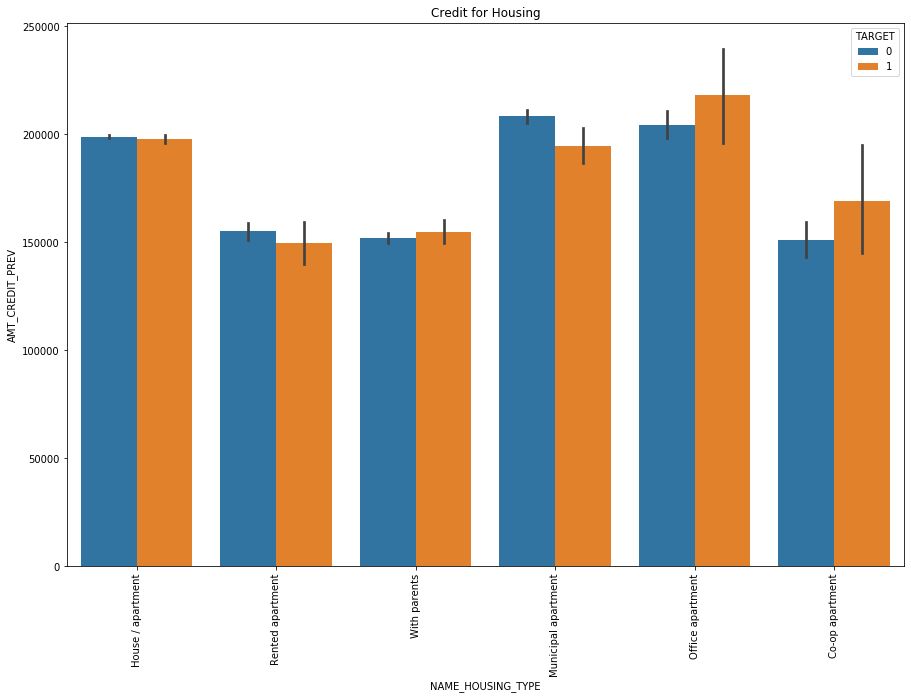

In [153]:
plt.figure(figsize = (15,10))
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV', hue = 'TARGET' , data = df_application)
plt.title('Credit for Housing')
plt.xticks(rotation = 90)
plt.show()

The above graph shows that the municipal apartment has higher credit in case of Target0 and Office apartment along with co-op apartment  have more credit for Target1. This indicates that bank should avoid giving loans to office apartment and  co-op apartment as they are facing problems in paying the loan amount. Indeed, they should focus on other housing type categories i.e house apartment, municipal aprtment so that they could recieve their payments on time without any default.

<b> NAME_CONTRACT_STATUS loan status and CODE_GENDER </b>

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
CODE_GENDER                                                    
F                       598649    179044   163327         14174
M                       287450     80397    82063          8597


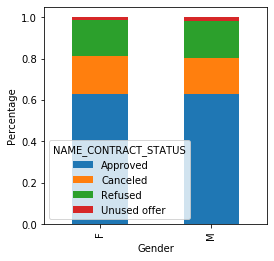

In [154]:
print(pd.crosstab(df_application['CODE_GENDER'],df_application['NAME_CONTRACT_STATUS']))

Gender = pd.crosstab(df_application['CODE_GENDER'],df_application['NAME_CONTRACT_STATUS'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

From the above graph, the porportion of previous loan approval is more for females compared to the males.

<b> NAME_CONTRACT_STATUS loan status vs income_group income of the applicant </b>

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
income_group                                                   
low                     272211     67766    64957          6483
middle                  152943     43893    41174          4021
above_middle            247015     77576    72213          6720
high                    206809     67960    64497          5393


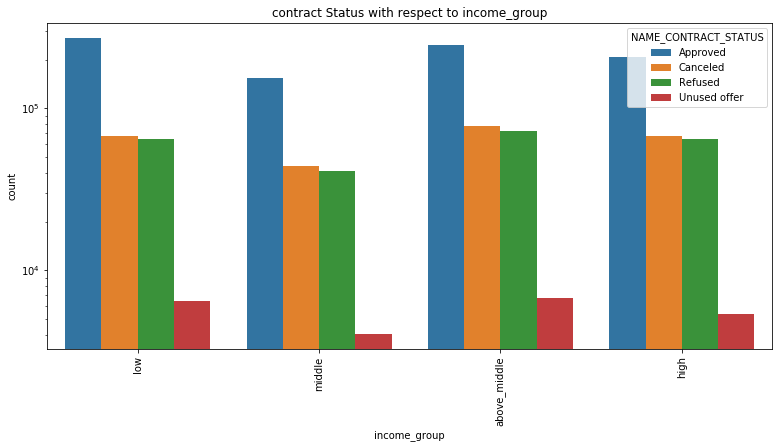

In [155]:
print(pd.crosstab(df_application['income_group'],df_application['NAME_CONTRACT_STATUS']))

plt.figure(figsize = (13,6))
sns.countplot(x='income_group', hue='NAME_CONTRACT_STATUS', data = df_application)
plt.title('contract Status with respect to income_group')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

 Based on the above graph we can infer that ,loan application is mostly cancelled for above_middle income group. While it is least cancelled for middle income group . And a higher proportion of loan approval is for low income group and above_middle income group categories

<b> NAME_FAMILY_STATUS-Family status of the client and NAME_CONTRACT_STATUS loan status

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_FAMILY_STATUS                                             
Civil marriage           86827     26143    28226          1961
Married                 577137    167233   152167         14373
Separated                56750     16535    16453          1600
Single / not married    114880     33403    34292          4082
Widow                    50505     16127    14252           755


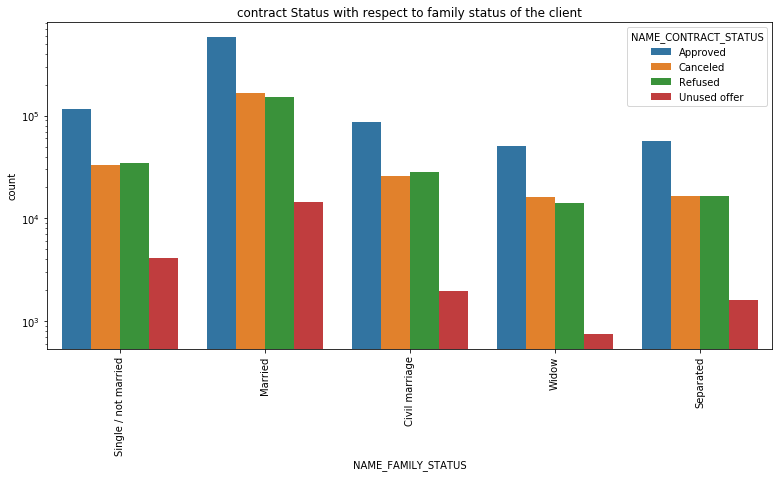

In [156]:
print(pd.crosstab(df_application['NAME_FAMILY_STATUS'],df_application['NAME_CONTRACT_STATUS']))

plt.figure(figsize = (13,6))
sns.countplot(x='NAME_FAMILY_STATUS', hue='NAME_CONTRACT_STATUS', data = df_application)
plt.title('contract Status with respect to family status of the client')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()


From the above graph we can infer that the previous loan approval is more for the married couple compared to other groups.

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
bin_age                                                        
young                   179964     46019    55686          7232
middle age              291192     79331    77015          8863
above_middle age        241400     75269    66877          4661
senior                  173488     58811    45812          2014


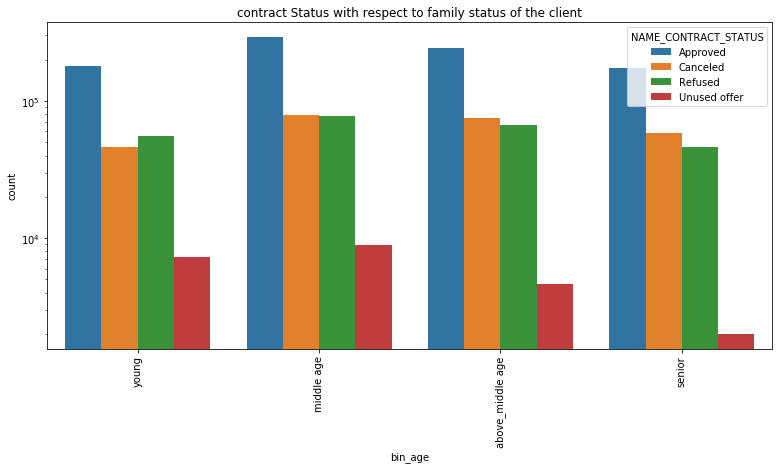

In [157]:
print(pd.crosstab(df_application['bin_age'],df_application['NAME_CONTRACT_STATUS']))

plt.figure(figsize = (13,6))
sns.countplot(x='bin_age', hue='NAME_CONTRACT_STATUS', data = df_application)
plt.title('contract Status with respect to family status of the client')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

From the above graph we can infer that the approval ratio of the loan application of senior clients is less as compared to other categories.

# Conclusion

Based on the above analysis, we conclude that the following features are important in order to decide if the client will be able to pay the loan or will likely to default.<br>
1) AMT_CREDIT <br>
2) AMT_INCOME <br>
4) NAME_INCOME_TYPE <br>
5) OCCUPATION TYPE <br>
6) NAME_CASH_LOAN_PURPOSE <br>
7) NAME_FAMILY_STATUS <br>
8) CODE_GENDER <br>
9) CODE_GENDER <br>
10) DAYS_BIRTH <br>

Important results:<br>
a) Males under low and middle income group who are state servants should be preferred by banks. <br>
b) Banks should focus on state servants and  pensioners who wanted to buy land, home or car as such clients have more credit and they hardly default on their payments.
